In [25]:
from mayavi import mlab
import surfer
import mne
from mne.minimum_norm import read_inverse_operator, apply_inverse
data_path = mne.datasets.sample.data_path()
mlab.init_notebook('png')
%matplotlib inline

Notebook initialized with png backend.


In [2]:
data_path

'/l/vanvlm1/mne_data/MNE-sample-data'

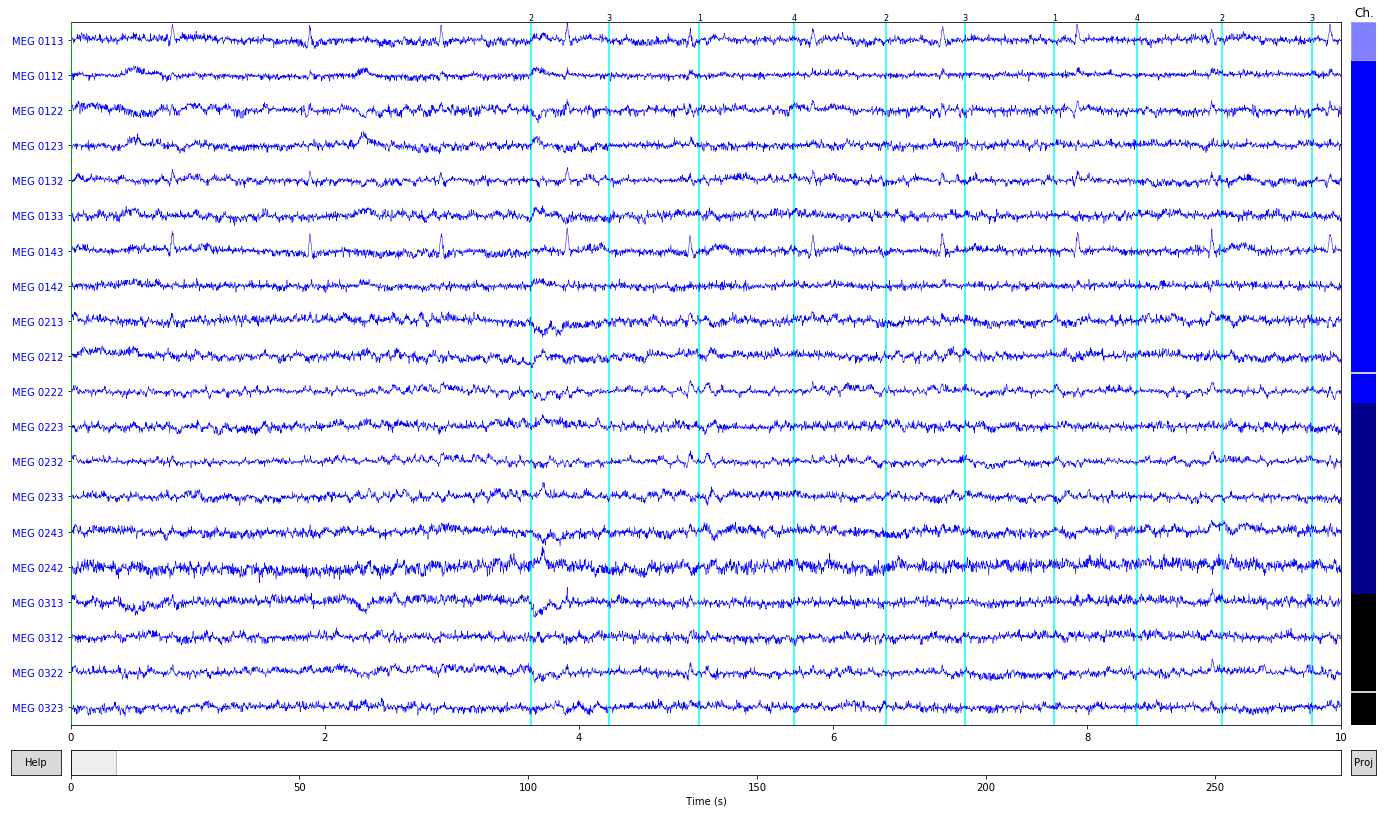

In [7]:
raw = mne.io.read_raw_fif(data_path + '/MEG/sample/sample_audvis_raw.fif')
events = mne.find_events(raw)
raw.plot(events=events);

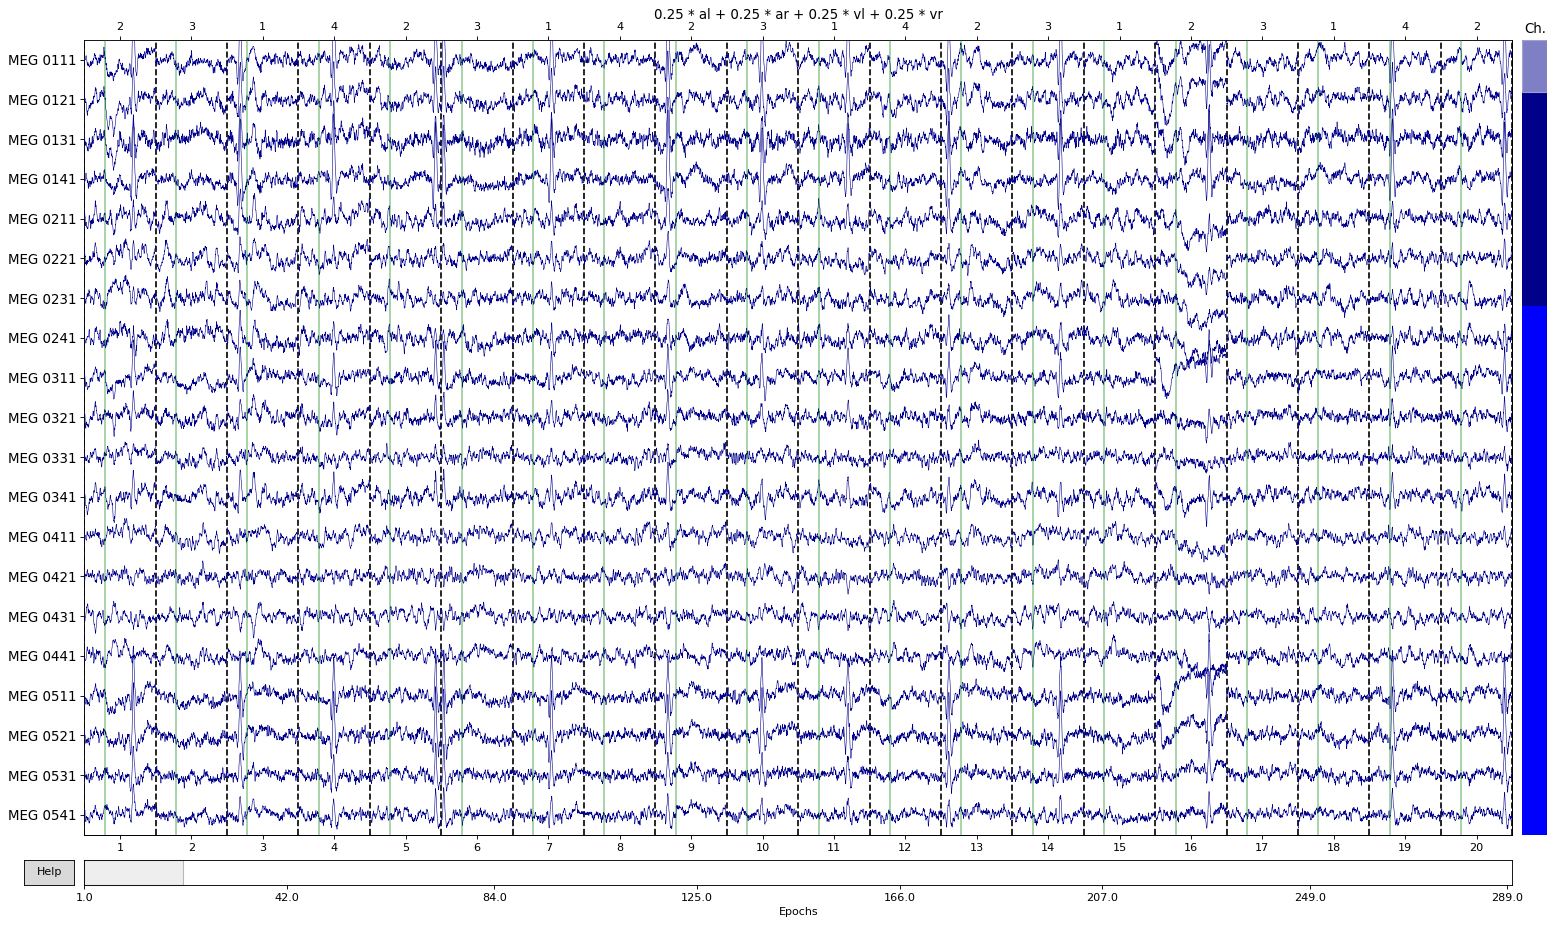

In [58]:
picks = mne.pick_types(raw.info, meg=True, eeg=False)
epochs = mne.Epochs(raw, events, event_id=dict(al=1, ar=2, vl=3, vr=4), tmin=-0.2, tmax=0.5, baseline=(-0.2, 0), picks=picks)
epochs.plot();

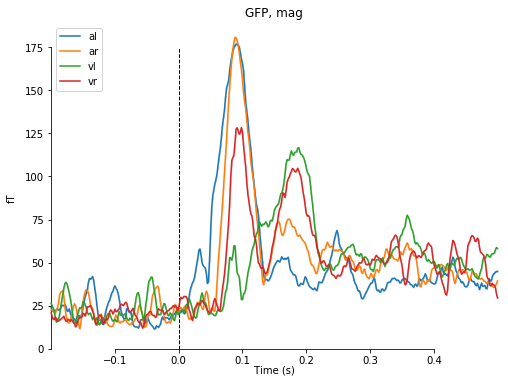

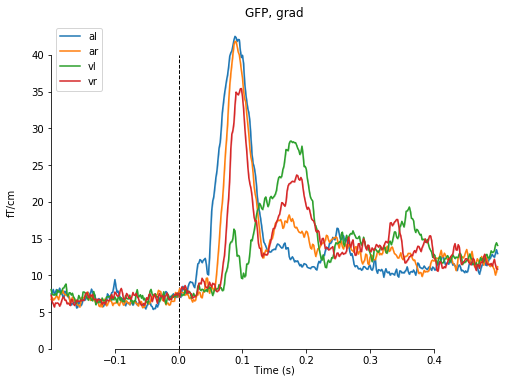

[<Figure size 576x432 with 1 Axes>, <Figure size 576x432 with 1 Axes>]

In [59]:
evoked = {cl:epochs[cl].average() for cl in epochs.event_id.keys()}
mne.viz.plot_compare_evokeds(evoked, show_legend='upper left')


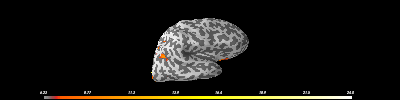


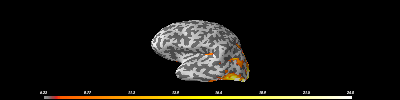


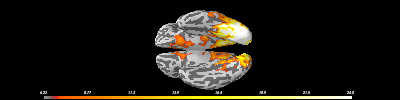


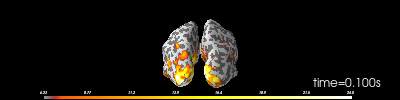

In [57]:
# Read inverse solution
fname_inv = data_path + '/MEG/sample/sample_audvis-meg-oct-6-meg-inv.fif'
inv = read_inverse_operator(fname_inv)

# Apply inverse solution, set pick_ori='vector' to obtain a
# :class:`mne.VectorSourceEstimate` object
snr = 3.0
lambda2 = 1.0 / snr ** 2
stc = apply_inverse(evoked['vr'], inv, lambda2, 'dSPM')

# Plot the source estimate
stc.plot(initial_time=0.1, hemi='both', views=['lateral', 'medial', 'ventral', 'caudal'], size=400, subjects_dir=data_path + '/subjects')

In [47]:
stc.plot?

In [52]:
surfer.viz.viewdicts

{'lh': {'lateral': {'v': (180.0, 90.0), 'r': 90.0},
  'medial': {'v': (0.0, 90.0), 'r': -90.0},
  'rostral': {'v': (90.0, 90.0), 'r': -180.0},
  'caudal': {'v': (270.0, 90.0), 'r': 0.0},
  'dorsal': {'v': (180.0, 0.0), 'r': 90.0},
  'ventral': {'v': (180.0, 180.0), 'r': 90.0},
  'frontal': {'v': (120.0, 80.0), 'r': 106.739},
  'parietal': {'v': (-120.0, 60.0), 'r': 49.106}},
 'rh': {'lateral': {'v': (180.0, -90.0), 'r': -90.0},
  'medial': {'v': (0.0, -90.0), 'r': 90.0},
  'rostral': {'v': (-90.0, -90.0), 'r': 180.0},
  'caudal': {'v': (90.0, -90.0), 'r': 0.0},
  'dorsal': {'v': (180.0, 0.0), 'r': 90.0},
  'ventral': {'v': (180.0, 180.0), 'r': 90.0},
  'frontal': {'v': (60.0, 80.0), 'r': -106.739},
  'parietal': {'v': (-60.0, 60.0), 'r': -49.106}}}